In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

#### Read csv by pandas

In [347]:
df = pd.read_csv("housePrice.csv")
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


#### Filltering Datas
- by dropna remove nulls values
- replace True False to 1 0

In [357]:
df['Area'] = pd.to_numeric(df['Area'], errors='coerce') # if str(float)>=1000 will be deleted
print (df["Area"].dtype)
df = df.dropna() # delet nulls
df = df.replace(True,1)
df = df.replace(False,0)
# df.describe() # to describe Datas
df

# ------------------------------------------------------------------------- it can be usefull 
# df['Area'] = df['Area'].str.replace('"', '').astype(float)
# pd.to_numeric(df["Area"], downcast='int')
# df['Area'] = df['Area'].astype(float)

float64


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,1,1,1,Shahran,1.850000e+09,61666.67
1,60.0,1,1,1,1,Shahran,1.850000e+09,61666.67
2,79.0,2,1,1,1,Pardis,5.500000e+08,18333.33
3,95.0,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86.0,2,1,1,1,Southern Janatabad,3.500000e+09,116666.67
3475,83.0,2,1,1,1,Niavaran,6.800000e+09,226666.67
3476,75.0,2,0,0,0,Parand,3.650000e+08,12166.67
3477,105.0,2,1,1,1,Dorous,5.600000e+09,186666.67


#### Scatter the chart by Area Price

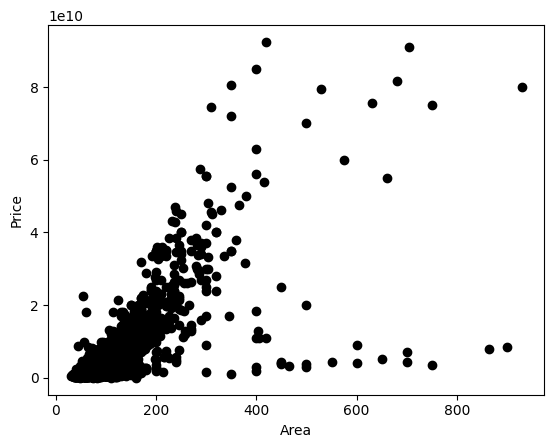

In [349]:
cdf = df[["Area","Room",'Parking','Warehouse','Elevator',"Price"]]
# cdf = cdf.sort_values(by=['Price'] ,  ascending=True)  #sort by Price


plt.scatter(cdf.Area, cdf.Price,  color='black')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

#### Group datas to train and test
- 80% ----> train
- 20% ----> test
###### ( its for testing machine to know how accurately does it predict , machin will learn by train part and we test it by test part ) 

In [350]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

# <font color='red'>Multiple Regretion :
### <font color='black'>Find Coefficients

In [363]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Area','Room','Parking','Warehouse','Elevator']])
y = np.asanyarray(train[['Price']])
regr.fit (x, y)

# The coefficients
print ('Coefficients: ', regr.coef_)          # Coefficients for x1 , x2, x3
print ('intercept_: ', regr.intercept_)       # Constant number

Coefficients:  [[ 7.19967351e+07  1.35853163e+09 -1.58711200e+08  1.00509873e+09
   1.06316973e+09]]
intercept_:  [-6.77789157e+09]


### Time for get Multy-Score

In [364]:
y_hat= regr.predict(test[['Area','Room','Parking','Warehouse','Elevator']])
x = np.asanyarray(test[['Area','Room','Parking','Warehouse','Elevator']])
y = np.asanyarray(test[['Price']])

print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 31202239078403006464.00
Variance score: 0.56


C:\Users\Amin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# <font color='red'>None-linear Multiple

In [353]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Fit nonlinear model using polynomial function of degree 2
poly = PolynomialFeatures(degree=2)
x_train = poly.fit_transform(train[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator']])
y_train = train['Price']
reg = LinearRegression().fit(x_train, y_train)
print('Coefficients: ', reg.coef_)
print('Intercept:   ', reg.intercept_)

Coefficients:  [ 0.00000000e+00  8.17233834e+07 -5.38683420e+09  1.30800359e+09
 -5.04987436e+08 -6.20538495e+08 -7.66733385e+04  3.08918609e+07
 -8.86280782e+07 -2.34000305e+06  6.81247653e+07 -9.76048362e+07
  1.88394645e+09  1.29909413e+09 -1.33711799e+09  1.30800359e+09
  1.07868233e+09  2.42483937e+08 -5.04987436e+08 -1.57904703e+09
 -6.20538495e+08]
Intercept:  568210072.9375343
